<a href="https://colab.research.google.com/github/pmama/Amazon_Stock_prediction_LSTM/blob/main/Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Stock Prediction**

<img src='https://deadline.com/wp-content/uploads/2018/03/amazon.jpg?w=681&h=383&crop=1'>

In [1]:
# panda technical analysis
!pip install pandas_ta -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip install mplfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


# **Importing Necessary Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf #matplotlib finance
import seaborn as sns
import yfinance as yf
import pandas_ta as ta # for technical analysis


from keras.models import Sequential
from keras.layers import *


# **Downloading StockPrice Using `yfinance`**

In [5]:
df = yf.download(tickers = 'AMZN', start = '2018-11-20',end = '2023-11-20')
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000
2018-11-21,77.149498,77.500000,75.750000,75.836502,75.836502,114336000
2018-11-23,75.849998,76.809998,75.090500,75.102997,75.102997,54152000
2018-11-26,76.949997,79.240501,76.210999,79.066498,79.066498,125154000
2018-11-27,78.799500,79.882500,77.900497,79.070999,79.070999,115664000
2018-11-28,80.695999,84.072502,80.060997,83.887497,83.887497,169174000
2018-11-29,83.749496,84.499496,82.616501,83.678497,83.678497,132264000
2018-11-30,83.974998,84.800003,83.324997,84.508499,84.508499,115236000
2018-12-03,88.473000,88.917000,86.500000,88.617996,88.617996,137246000


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700


# Visualising Stocks

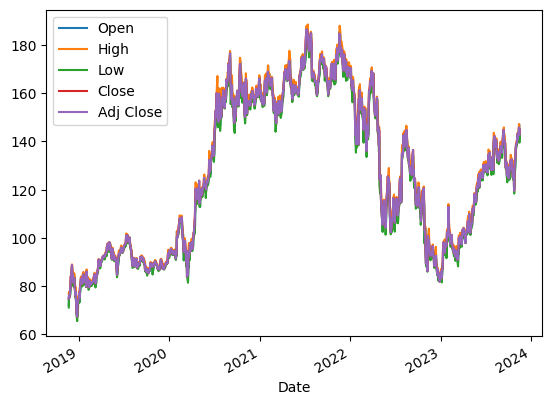

In [7]:
df.iloc[:,:-1].plot()
plt.show()

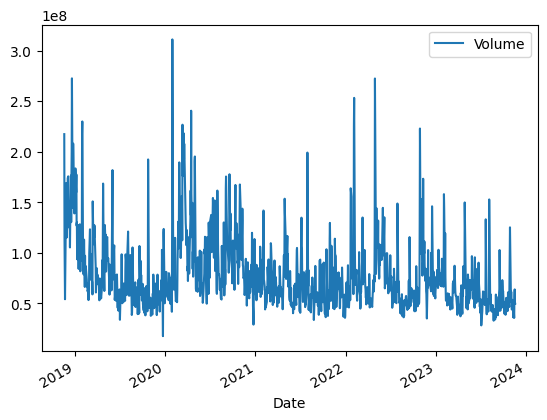

In [8]:
df.iloc[:,-1].plot()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


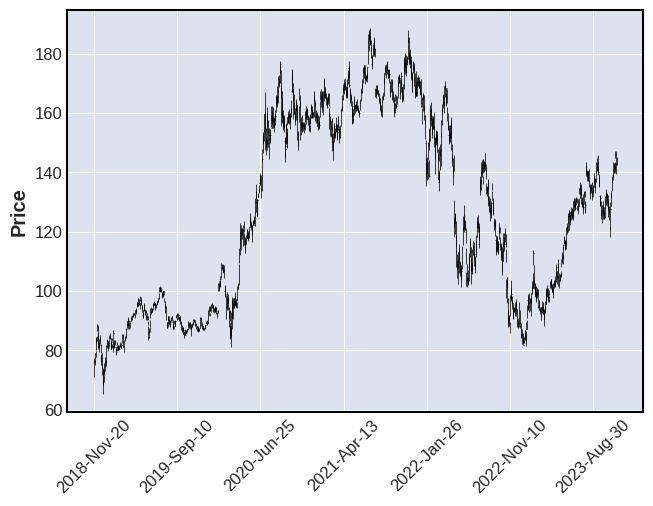

In [9]:
mpf.plot(df)

### **OHLC Chart (Open,High,Low,Close data ):**

<ipython-input-10-0600b1a52a16>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(df['2020-03'], volume = True)


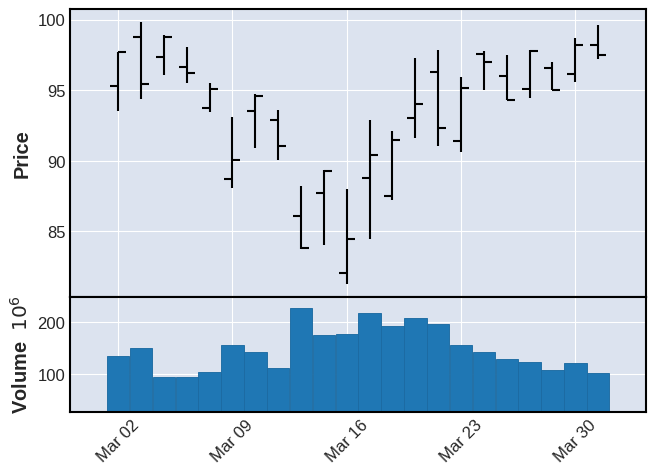

In [10]:
mpf.plot(df['2020-03'], volume = True)

### **Candle Stick Chart for March 2020**

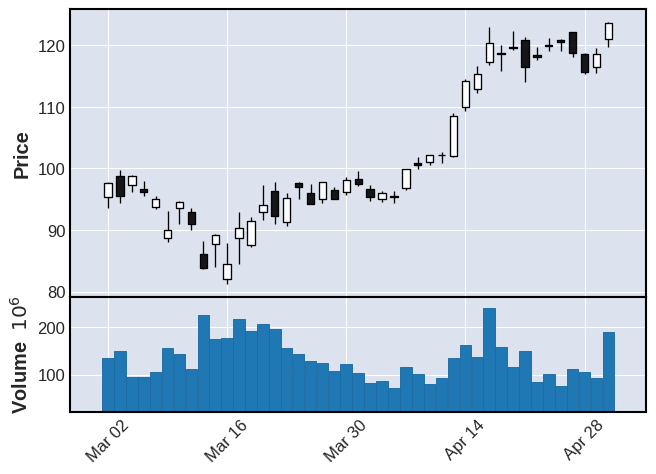

In [11]:
mpf.plot(df['2020-03':'2020-04'],type ='candle',  volume = True)

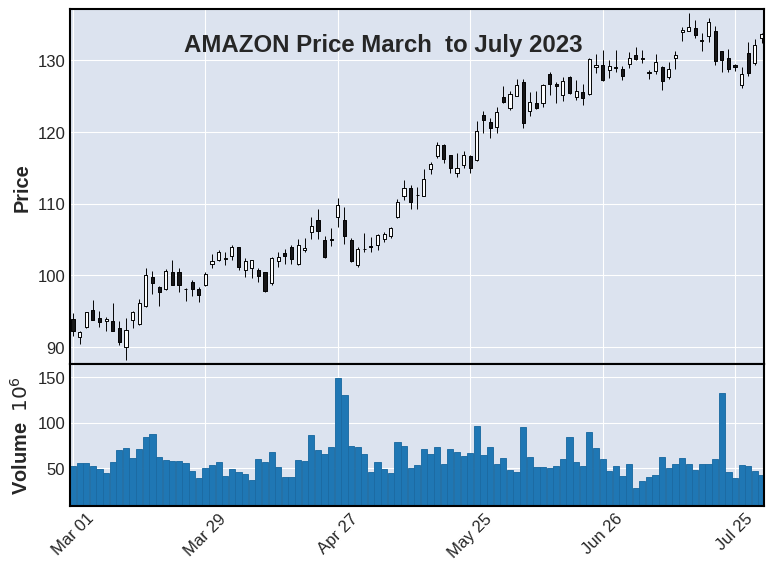

In [12]:
mpf.plot(df['2023-03':'2023-07'], type='candle',
         title= 'AMAZON Price March  to July 2023',
         volume = True, tight_layout = True)

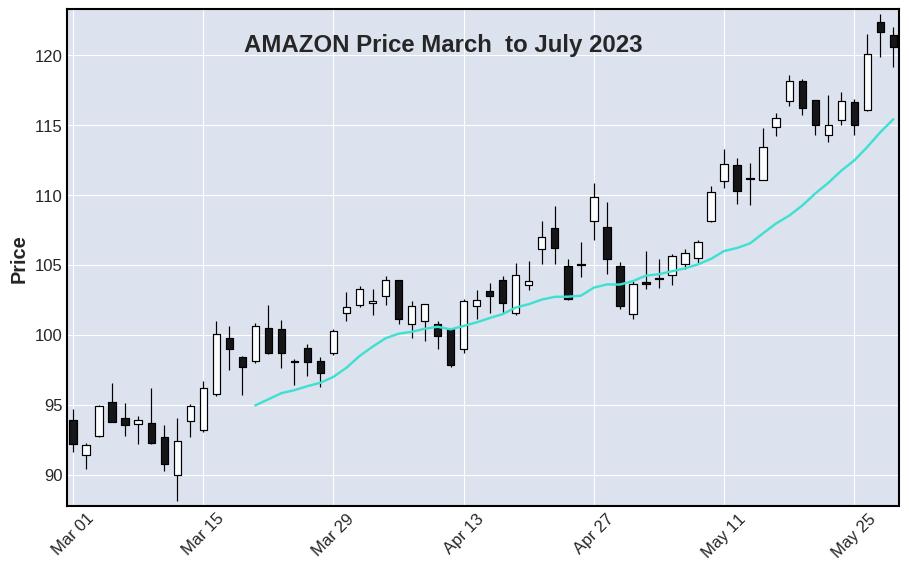

In [13]:
mpf.plot(df['2023-03':'2023-05'], figratio=(20,12),
         type='candle', title= 'AMAZON Price March  to July 2023',
         mav=15, tight_layout = True)

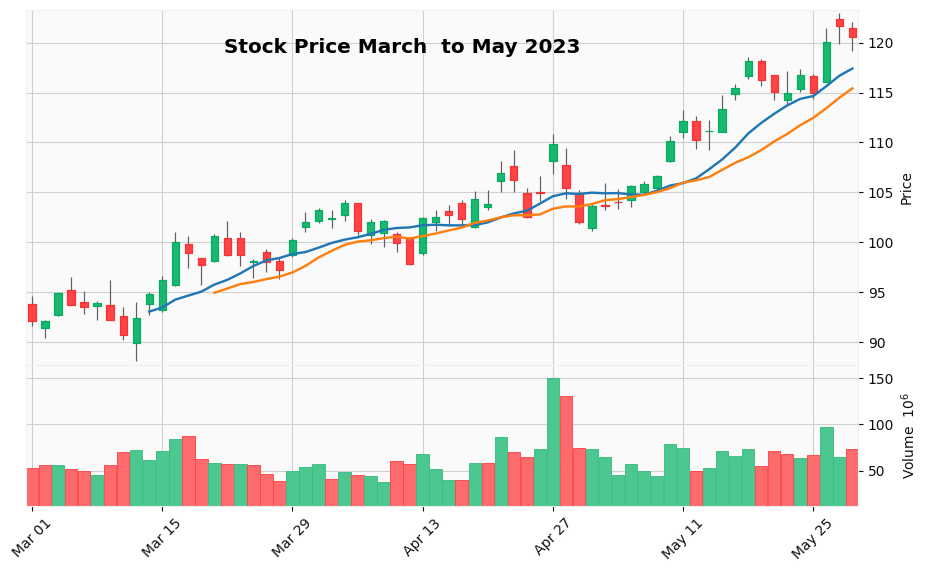

In [14]:
mpf.plot(df['2023-03':'2023-05'],
         figratio=(10,6), type='candle',
        title= 'Stock Price March  to May 2023',
         mav=(10,15),
         #ema=(10),
         volume = True,
         tight_layout = True, style ='yahoo',
        )

In [ ]:
#mpf.available_styles()

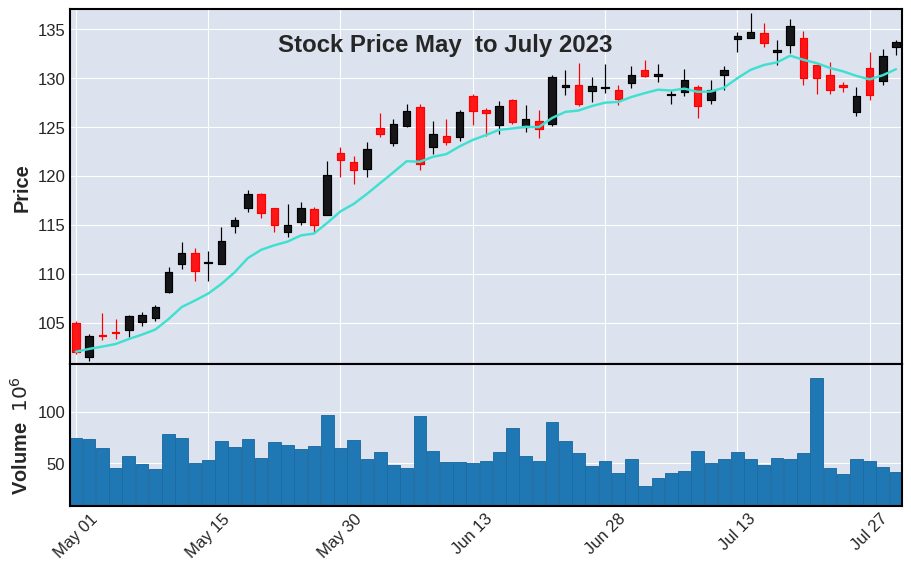

In [15]:
mpf.plot(df['2023-05':'2023-07'],
         figratio=(10,6), type='candle',
        title= 'Stock Price May  to July 2023',
         #mav=(10,15),
         ema=(10),
         volume = True,
         tight_layout = True, style ='kenan',
        )

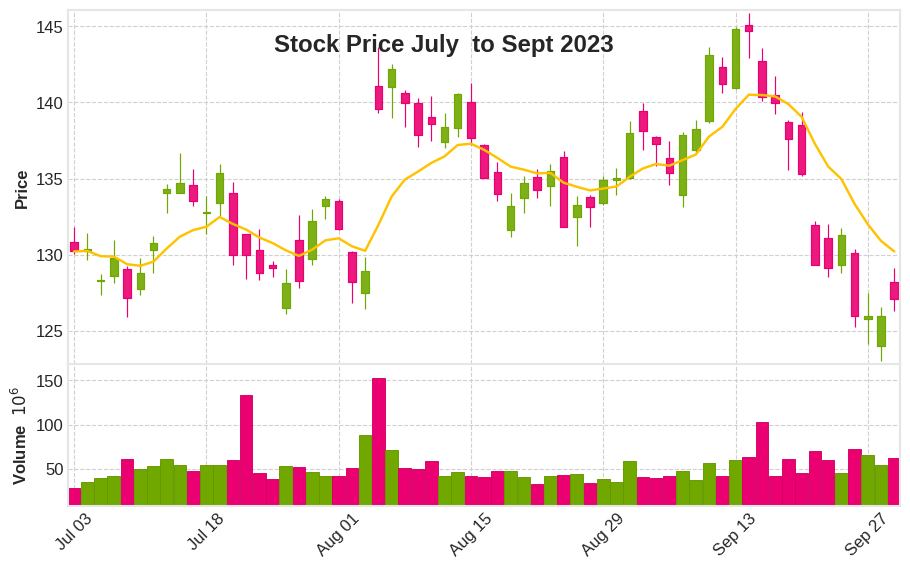

In [16]:
mpf.plot(df['2023-07':'2023-09'],
         figratio=(10,6), type='candle',
         title= 'Stock Price July  to Sept 2023',
         #mav=(10,15),
         ema=(10),
         volume = True,
         tight_layout = True, style ='binance',
        )

# **Adding some Technical Indicator to the data**

**Relative Strength Index (RSI):**
Measures the speed and change of price movements, indicating overbought or oversold conditions.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\text{RSI} = 100 - \frac{100}{1 + \frac{\text{Average Gain}}{\text{Average Loss}}}$


Readings below 30 generally indicate that the stock is oversold, while readings above 70 indicate that it is overbought.

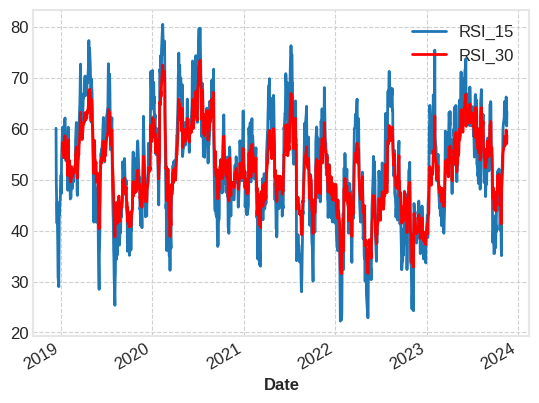

In [17]:
#calculates the RSI with a lookback period of 15.
RSI_15 =ta.rsi(df.Close, length=15)
RSI_30 =ta.rsi(df.Close, length=30)
RSI_15.plot()
RSI_30.plot(color ='red')
plt.legend()
plt.show()

In [18]:
df['RSI'] =ta.rsi(df.Close, length=15)

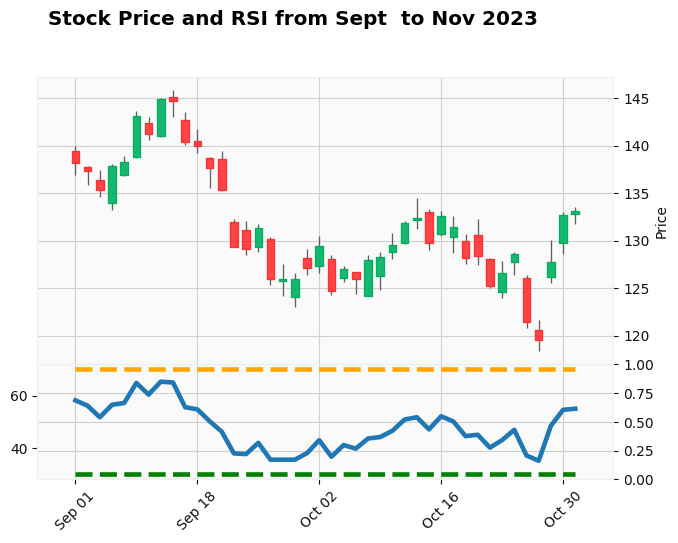

In [19]:
mpf.plot(df['2023-09':'2023-10'], type='candle', style='yahoo',
         title= 'Stock Price and RSI from Sept  to Nov 2023',
         addplot=[mpf.make_addplot(df['RSI']['2023-09':'2023-10'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df['2023-09':'2023-10']), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df['2023-09':'2023-10']), panel=1, secondary_y=True, color='green', linestyle='--')
                  ])

In [ ]:
fig, ax = mpf.plot(df, type='candle', style='yahoo', figratio=(5,3),
         title= 'Stock Price and RSI', tight_layout = True,
         addplot=[mpf.make_addplot(df['RSI'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df), panel=1, secondary_y=True, color='g', linestyle='--')],
        returnfig = True
                   )
ax[1].annotate('Overbought', xy=(df.index[-1], 70), xytext=(df.index[-1], 70), textcoords='offset points',
                  color='r', ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

ax[1].annotate('Oversold', xy=(df.index[-1], 30), xytext=(df.index[-1], 30),  textcoords='offset points',
                  color='r', ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

mpf.show()

**EMAF (Exponential Moving Average - Fast):**
EMAs give more weight to recent prices, making them more responsive to recent changes.

In [20]:
#calculates the EMA with a smoothing period of 20.
df['EMAF']= ta.ema(df.Close, length=20)

**EMAM (Exponential Moving Average - Medium):**
This calculates another EMA for the 'Close' prices, but with a longer time period compared to EMAF. It's often referred to as a medium-term EMA.

In [21]:
# calculates the EMA with a smoothing period of 100.
df['EMAM']=ta.ema(df.Close, length=100)

**EMAS (Exponential Moving Average - Slow):**
This calculates yet another EMA for the 'Close' prices, with an even longer time period. It's often referred to as a slow or long-term EMA.

In [22]:
# calculates the EMA with a smoothing period of 150.
df['EMAS']=ta.ema(df.Close, length=200)

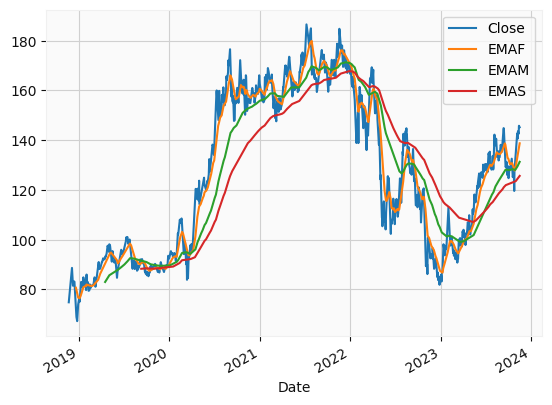

In [23]:
df['Close'].plot()
df['EMAF'].plot()
df['EMAM'].plot()
df['EMAS'].plot()
plt.legend()

**Intraday Price Movement:**

The difference between the opening and adjusted closing prices provides insight into how much the price of a financial instrument has moved within a single trading day. It gives you a sense of intraday volatility.

**Market Sentiment:**
Positive values (df['Adj Close'] > df['Open']) suggest that the closing price was higher than the opening price, potentially indicating positive market sentiment or buying pressure during the day.
Negative values (df['Adj Close'] < df['Open']) suggest that the closing price was lower than the opening price, potentially indicating negative market sentiment or selling pressure during the day.


In [24]:
df['Target'] = df['Adj Close']- df['Open']
df['Target'] = df['Target'].shift(-1)


**Shifted Close Price:**

In [25]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)

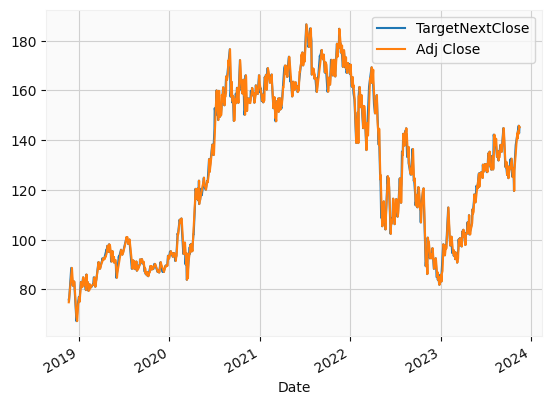

In [26]:
df['TargetNextClose'].plot()
df['Adj Close'].plot()
plt.legend()

<Axes: xlabel='Date'>

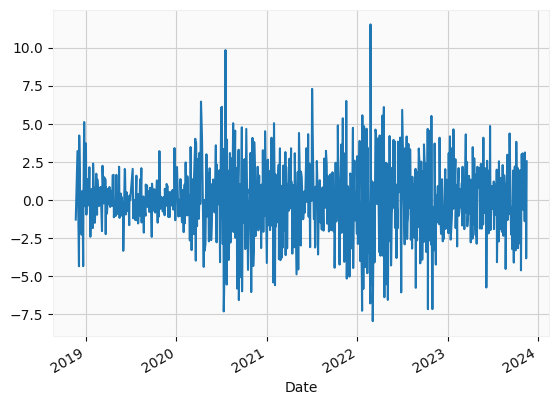

In [27]:
df['Target'].plot()

In [28]:
df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

- Positive values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 1
- Negative values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 0

<Axes: ylabel='TargetClass'>

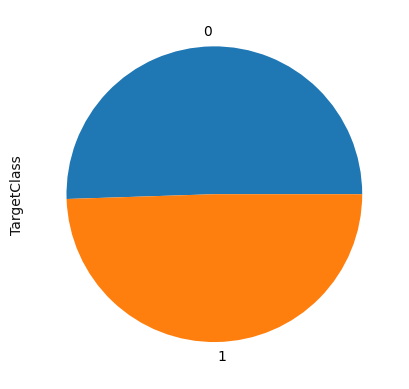

In [29]:
df['TargetClass'].value_counts().plot(kind='pie', )

In [30]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
Date,,,,,,,,,,,,,
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,62.737820,136.030721,130.197965,124.863575,0.800003,145.800003,1
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,66.243138,136.961128,130.506916,125.071897,-3.860001,143.199997,0
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,61.243370,137.555306,130.758264,125.252276,1.919998,142.830002,1
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,60.546609,138.057658,130.997308,125.427179,2.519989,145.179993,1
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,63.381634,138.735976,131.278154,125.623724,NaN,NaN,0


# **Components of TSA**

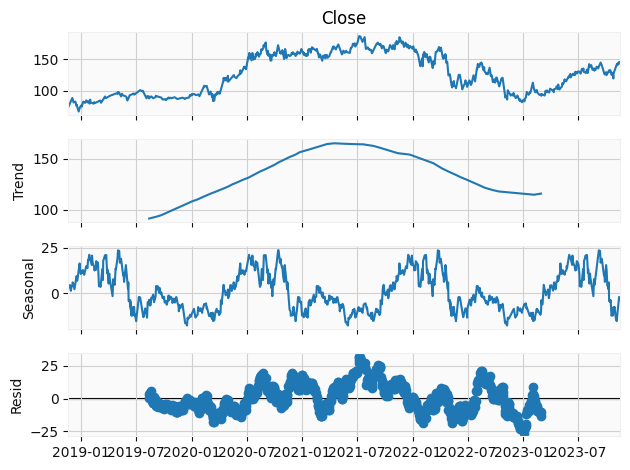

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df.Close, period=365)
decompose.plot()
plt.show()

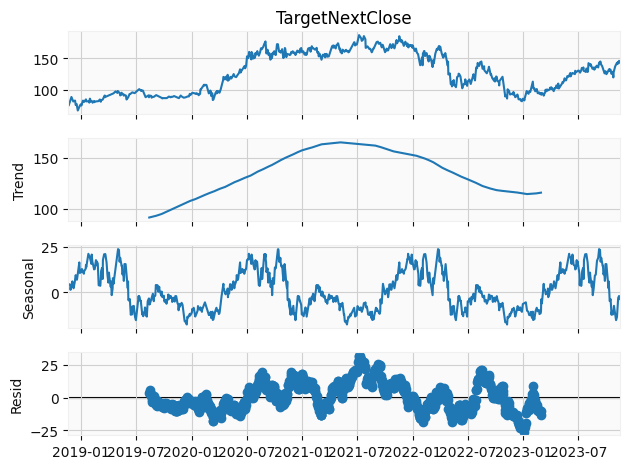

In [32]:
decompose= seasonal_decompose(df.TargetNextClose.dropna(), period=365)
decompose.plot()
plt.show()

# **Augmented Dicker Fuller(ADFuller) Test for checking stationarity**

In [33]:
from statsmodels.tsa.stattools import adfuller
def adfuller_prob(df,col):
  ts= df[col].dropna()
  ts_prob = adfuller(ts)[1]
  print(f'Probability  is {ts_prob}')
  if ts_prob < 0.05:
    print('TS is stationary')
  else:
    print(f'TS = {col} is non-stationary')
    ts1 = df[col].diff().dropna()
    ts1_prob = adfuller(ts1)[1]
    print(f'Probability of 1st difference is {ts1_prob}')
    if ts1_prob < 0.05:
      print(f'TS{col} of diff1 is stationary')

adfuller_prob(df, col='Close')

Probability  is 0.31381884441342534
TS = Close is non-stationary
Probability of 1st difference is 0.0
TSClose of diff1 is stationary


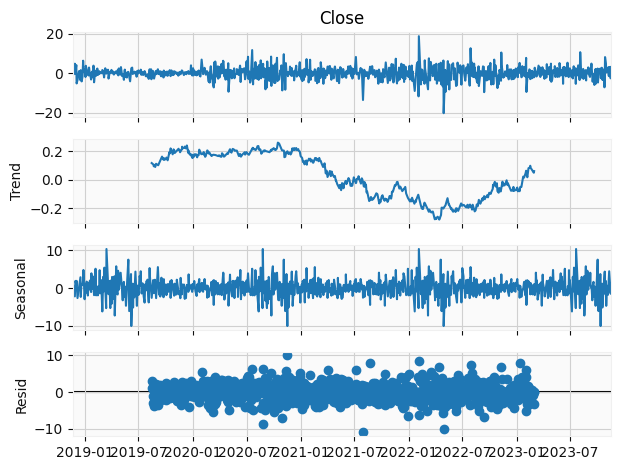

In [34]:
seasonal_decompose(df.Close.diff().dropna(), period=365).plot()
plt.show()

In [35]:
adfuller_prob(df, col='Target')

Probability  is 0.0
TS is stationary


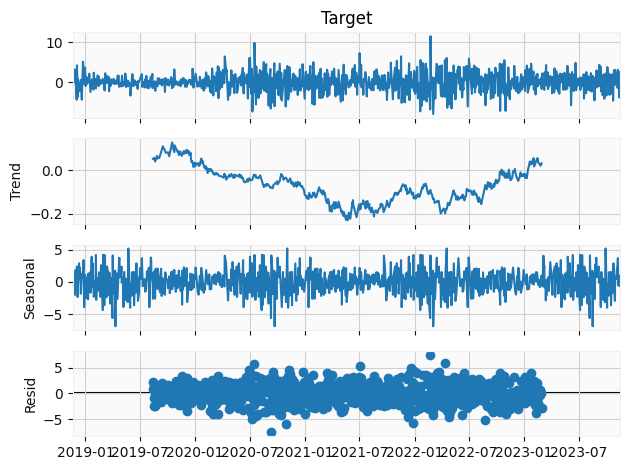

In [36]:
seasonal_decompose(df.Target.dropna(), period=365).plot()
plt.show()

In [37]:
df1 = df.dropna(inplace= True)
df1= df.reset_index()
df1= df1.drop(['Volume','Close'],axis=1)
pd.set_option('display.max_columns', None)

df1.head()

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
0,2019-09-09,92.050003,92.500000,91.230499,91.567497,51.900812,90.527643,91.512117,88.261617,-0.110001,91.027496,0
1,2019-09-10,91.137497,91.290497,90.266998,91.027496,49.922949,90.575249,91.502520,88.289139,0.542496,91.149498,1
2,2019-09-11,90.607002,91.670998,90.454002,91.149498,50.380677,90.629939,91.495530,88.317600,0.295998,92.177498,1
3,2019-09-12,91.881500,92.682999,91.713997,92.177498,54.163134,90.777326,91.509034,88.356007,-0.133499,91.967003,0
4,2019-09-13,92.100502,92.306000,91.758499,91.967003,53.272220,90.890628,91.518103,88.391937,-0.808998,90.391998,0


In [38]:
df1.Date.tail(1)

1056   2023-11-16
Name: Date, dtype: datetime64[ns]

In [39]:
last_date = df1.Date.tail(1).values
print('Last Date =', last_date)

Last Date = ['2023-11-16T00:00:00.000000000']


In [40]:
df1.shape

(1057, 12)

In [41]:
# excluding date and target_class
final_df = df1.iloc[:,1:-1]
final_df.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,92.050003,92.500000,91.230499,91.567497,51.900812,90.527643,91.512117,88.261617,-0.110001,91.027496
1,91.137497,91.290497,90.266998,91.027496,49.922949,90.575249,91.502520,88.289139,0.542496,91.149498
2,90.607002,91.670998,90.454002,91.149498,50.380677,90.629939,91.495530,88.317600,0.295998,92.177498
3,91.881500,92.682999,91.713997,92.177498,54.163134,90.777326,91.509034,88.356007,-0.133499,91.967003
4,92.100502,92.306000,91.758499,91.967003,53.272220,90.890628,91.518103,88.391937,-0.808998,90.391998


# **Splitting Data into train and test**

In [51]:
# split data into train test sets
splitlimit = int(len(final_df)*0.8)
print('split limit :', splitlimit)
train_data, test_data = final_df[:splitlimit], final_df[splitlimit:]
print('Shape of train', train_data.shape )
print('Shape of test', test_data.shape )

split limit : 845
Shape of train (845, 10)
Shape of test (212, 10)


# **Sacling the Data**

Scaling is important when working with Long Short-Term Memory (LSTM) networks for predicting stock prices or any time series data. LSTMs are a type of recurrent neural network (RNN) that are well-suited for sequential data like stock prices.

Activation Functions: LSTMs use activation functions, such as the hyperbolic tangent (tanh) or sigmoid functions, within their layers. These functions are sensitive to the scale of the input data. If the input data have vastly different scales, the network may have difficulty learning effectively.

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train_data)
sc_test = sc.transform(test_data)
print('==='*25)
print('Scaled Trained data')
print('==='*25)
print(sc_train)
print('==='*25)
print('Scaled Test data')
print('==='*25)
print(sc_test)
print('==='*25)


Scaled Trained data
[[-1.43961043 -1.47198489 -1.41846731 ... -1.658167   -0.00816763
  -1.47437249]
 [-1.4689035  -1.51058194 -1.44968532 ... -1.65716157  0.25670992
  -1.47044384]
 [-1.48593333 -1.49843959 -1.44362627 ... -1.65612179  0.15664528
  -1.43734058]
 ...
 [-1.47556451 -1.3839091  -1.42820365 ... -0.66600723 -0.63738343
  -1.33775711]
 [-1.28295384 -1.32231991 -1.34493412 ... -0.67333182  1.63591038
  -1.2459823 ]
 [-1.37123373 -1.28466434 -1.32484566 ... -0.67954752 -1.03114737
  -1.31263964]]
Scaled Test data
[[-1.22677573 -1.26807047 -1.27268068 ... -0.68645385 -0.69015515
  -1.33163873]
 [-1.27268128 -1.25434852 -1.28402108 ... -0.69350593 -0.39381403
  -1.38895757]
 [-1.35325681 -1.37816502 -1.36567049 ... -0.70113489  1.41263946
  -1.2739978 ]
 ...
 [ 0.26017867  0.27548828  0.31332832 ... -0.31337394 -1.53046094
   0.20566648]
 [ 0.32630825  0.27644559  0.24561118 ... -0.30678413  0.81589999
   0.19375204]
 [ 0.12888251  0.14975741  0.1461416  ... -0.3003944   1.0594

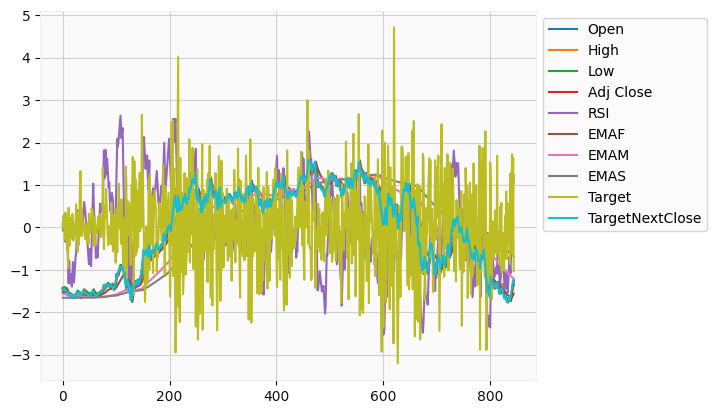

In [44]:
sc_train_df = pd.DataFrame(sc_train, columns = list(final_df))
sc_test_df = pd.DataFrame(sc_test, columns = list(final_df))
sc_train_df.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# **Predicting "TargetNextClose"**

In [45]:
def x_y_split(df, n_target,  n_past=14):
 x = np.array([df.iloc[i-n_past:i,:8].copy() for i in range(n_past,len(df))])
 yi = np.array(df.iloc[n_past:,n_target])
 y=np.reshape(yi,(len(yi),1))
 return x,y

x_train, y_train = x_y_split(sc_train_df , -1, 14)  # -1 is for last column of the dataset which is 'TargetNextClose'
x_test, y_test = x_y_split(sc_test_df ,n_target= -1, n_past=14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((831, 14, 8), (198, 14, 8), (831, 1), (198, 1))

# **Model**

In [46]:
model =Sequential([
    LSTM(150, activation ='relu', input_shape = (x_train.shape[1],x_train.shape[2]),return_sequences= True),
    LSTM(32, activation ='relu', return_sequences = False),
    Dense(64, activation ='relu'),
    Dense(32, activation ='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation ='linear')
])
model.compile(optimizer ='adam', loss ='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 150)           95400     
                                                                 
 lstm_1 (LSTM)               (None, 32)                23424     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 123049 (480.66 KB)
Trainable params: 12304

In [47]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1,verbose=1)

Epoch 1/20
12/12 [==============================] - 8s 68ms/step - loss: 0.4861 - val_loss: 0.1856
Epoch 2/20
12/12 [==============================] - 0s 40ms/step - loss: 0.1533 - val_loss: 0.1134
Epoch 3/20
12/12 [==============================] - 1s 48ms/step - loss: 0.1022 - val_loss: 0.1641
Epoch 4/20
12/12 [==============================] - 1s 69ms/step - loss: 0.0984 - val_loss: 0.1458
Epoch 5/20
12/12 [==============================] - 1s 78ms/step - loss: 0.0809 - val_loss: 0.1506
Epoch 6/20
12/12 [==============================] - 1s 69ms/step - loss: 0.0824 - val_loss: 0.1280
Epoch 7/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0725 - val_loss: 0.0923
Epoch 8/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0761 - val_loss: 0.0762
Epoch 9/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0740 - val_loss: 0.1226
Epoch 10/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0618 - val_loss: 0.0763
Epoch 11/

<Axes: >

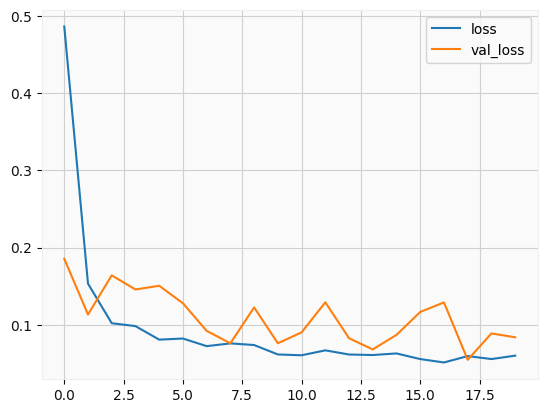

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()

7/7 [==============================] - 0s 10ms/step
[-0.9003661] [-1.11749791]
[-0.9454407] [-1.18383317]
[-0.98538494] [-1.24211827]
[-1.0263234] [-1.2624052]
[-1.0636586] [-1.20025606]
[-1.0963967] [-1.19510393]
[-1.1044405] [-1.14808935]
[-1.0980003] [-1.24501629]
[-1.0778373] [-1.27560798]
[-1.0782472] [-1.35997606]


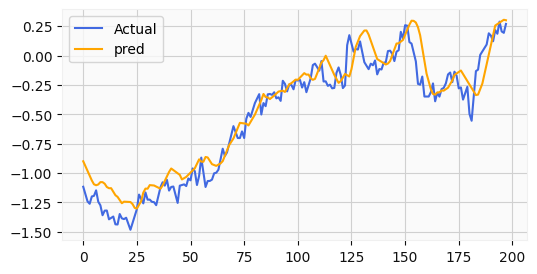

In [49]:
y_pred = model.predict(x_test)

for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(6,3))
plt.plot(y_test, color = 'royalblue', label = 'Actual')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend()
plt.show()